In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [5]:
# load dataset
df = pd.read_csv('../output/saida.csv')

# rows and columns of the data
print(df.shape)

# visualise the dataset
df.head()

(484381, 35)


,id_form,id_cliente,data,sistema_operacional,navegador,localizacao,locale_x,cidade_x,estado_x,qtde_lavagem_semana,...,status_pagamento,tipo_pagamento,valor_total,valor_desconto,frete_gratis,cidade_y,estado_y,locale_y,utm_source_y,target
0,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,Safari,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,4,...,Entregue,CARTÃO,124.03,0.0,False,São Paulo,SP,BR,NaN,1.0
1,72830da153824af486be15cd48b3f3,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,...,Cancelado,PIX,282.22,0.0,False,Jundiaí,SP,BR,NaN,1.0
2,72830da153824af486be15cd48b3f3,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,...,Cancelado,PIX,282.22,0.0,False,Jundiaí,SP,BR,NaN,1.0
3,d101fc0075dac29db1168cfc61ad44,c3344fad450ee424700d,2022-01-04 19:34:05,Android,Chrome,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0957fb9d7be36b4d079b6582bb6785,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,Chrome,"Manchester, England",BR,MANCHESTER,ENGLAND,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fillna - Variável Target

In [3]:
df.target.fillna(0, inplace=True)

In [4]:
#convert columns caracteristic and procedimentos to list
df['caracteristica'] = df['caracteristica'].apply(lambda x: x.replace(' ',''))
df['caracteristica'] = df['caracteristica'].apply(lambda x: x.split(','))
df.procedimentos.replace('N/C','N_C', inplace=True)
df['procedimentos'] = df['procedimentos'].apply(lambda x: x.split(','))

df.efeitos_desejados.replace('N/C','efeitos_desejados_N_C', inplace=True)
df.efeitos_desejados.fillna('Missing_efeitos_desejados', inplace=True)
df['efeitos_desejados'] = df['efeitos_desejados'].apply(lambda x: x.replace(' ',''))
df['efeitos_desejados'] = df['efeitos_desejados'].apply(lambda x: x.split(','))



In [5]:
from sklearn.preprocessing import MultiLabelBinarizer


mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('caracteristica')),
                index=df.index,
                columns=mlb.classes_))

In [6]:
mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('efeitos_desejados')),
                index=df.index,
                columns=mlb.classes_))

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('procedimentos')),
                index=df.index,
                columns=mlb.classes_))

### Split data into train and test

In [7]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['target'], axis=1), # predictive variables
    df['target'], # target
    test_size=0.2, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((387504, 63), (96877, 63))

In [8]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = under.fit_resample(X_train, y_train)
X_test, y_test = under.fit_resample(X_test, y_test)

C:\Users\cassio.reis_saudeid\Desktop\CASSIO\leads_classification\venv\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\cassio.reis_saudeid\Desktop\CASSIO\leads_classification\venv\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [9]:
####CONFIGURATION

DROP_FEATURES = [
    'id_cliente',
    'localizacao',
    'id_form',
    'status_pagamento',
    'tipo_pagamento',
    'valor_total',
    'valor_desconto',
    'frete_gratis',
    'cidade_y',
    'estado_y',
    'locale_y',
    'utm_source_y',
    'id_pedido',
    'data',
    'data_pedido',
    'locale_x',
    'cidade_x',
    'sistema_operacional',
]

# categorical variables with NA in train set
CATEGORICAL_VARS_WITH_NA_FREQUENT = [
 'navegador',
 'utm_source_x',

]


CATEGORICAL_VARS = [
                     'estado_x',
                     'utm_source_x',
                     'tipo_cabelo',
                     'comprimento',
                     'tipo_fios',
                     'tempo_procedimento',
                     'dieta',
                     'atividade_fisica',
                     'frequencia_estresse',
                     'faixa_etaria',
                     'fragancia',
                     'navegador'
]



#### Drop columns

In [10]:
from feature_engine.selection import DropFeatures

X_train = DropFeatures(DROP_FEATURES).fit_transform(X_train)
X_test = DropFeatures(DROP_FEATURES).fit_transform(X_test)


#### Missing Values Input

In [11]:
### Imputation
from feature_engine.imputation import (
    CategoricalImputer,
)

for col in ['estado_x']:
    inpt = CategoricalImputer(imputation_method='missing')
    X_train[col] = inpt.fit_transform(X_train[[col]])
    X_test[col] = inpt.transform(X_test[[col]])




In [12]:
# ('frequent_imputation', CategoricalImputer(
#         imputation_method='frequent', variables=CATEGORICAL_VARS_WITH_NA_FREQUENT)

for col in CATEGORICAL_VARS_WITH_NA_FREQUENT:
    inpt = CategoricalImputer(imputation_method='frequent')
    X_train[col] = inpt.fit_transform(X_train[[col]])
    X_test[col] = inpt.transform(X_test[[col]])

#### Encoder

In [13]:
pd.DataFrame({
    'col': X_train.columns,
    'type': X_train.dtypes,
    'missing': X_train.isnull().sum().values / X_train.shape[0]
}).sort_values('missing', ascending=False)

,col,type,missing
navegador,navegador,object,0.0
N/C,N/C,"Sparse[int32, 0]",0.0
Efeito10,Efeito10,"Sparse[int32, 0]",0.0
Efeito2,Efeito2,"Sparse[int32, 0]",0.0
Efeito3,Efeito3,"Sparse[int32, 0]",0.0
Efeito4,Efeito4,"Sparse[int32, 0]",0.0
Efeito5,Efeito5,"Sparse[int32, 0]",0.0
Efeito6,Efeito6,"Sparse[int32, 0]",0.0
Efeito7,Efeito7,"Sparse[int32, 0]",0.0
Efeito8,Efeito8,"Sparse[int32, 0]",0.0


#### Rare Labels

In [14]:
from feature_engine.encoding import (
    RareLabelEncoder,
)

for col in CATEGORICAL_VARS:
    encoder = RareLabelEncoder(tol=0.01)
    X_train[col] = encoder.fit_transform(X_train[[col]])
    X_test[col] = encoder.transform(X_test[[col]])

C:\Users\cassio.reis_saudeid\Desktop\CASSIO\leads_classification\venv\lib\site-packages\feature_engine\encoding\rare_label.py:178: UserWarning: The number of unique categories for variable tipo_cabelo is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\cassio.reis_saudeid\Desktop\CASSIO\leads_classification\venv\lib\site-packages\feature_engine\encoding\rare_label.py:178: UserWarning: The number of unique categories for variable comprimento is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\cassio.reis_saudeid\Desktop\CASSIO\leads_classification\venv\lib\site-packages\feature_engine\encoding\rare_label.py:178: UserWarning: The number of unique categories for variable tipo_fios is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\cassio.reis_saudeid\Desktop\CASSIO\leads_classification\v

In [15]:
from feature_engine.encoding import (
    OrdinalEncoder,
)

encoder = OrdinalEncoder(encoding_method='ordered', variables=CATEGORICAL_VARS)
encoder.fit(X_train, y_train)

X_train= encoder.transform(X_train)
X_test= encoder.transform(X_test)


#### Redução de dimensionalidade

In [16]:
#### Analise de variancia

In [17]:
# from sklearn.feature_selection import VarianceThreshold
#
# def variance_threshold_selector(data, threshold=0.5):
#     selector = VarianceThreshold(threshold)
#     selector.fit(data)
#     return data[data.columns[selector.get_support(indices=True)]]
#
# X_train = variance_threshold_selector(X_train, threshold=0.5)
# X_test = variance_threshold_selector(X_test, threshold=0.5)

### Modelos

In [18]:
from sklearn.metrics import *
from matplotlib import pyplot


### Regressão Logística

In [19]:
from sklearn.linear_model import LogisticRegression

clf_reg_log = LogisticRegression()
clf_reg_log.fit(X_train,y_train)
y_pred=clf_reg_log.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print('ROC: %.3f' % roc_auc_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

C:\Users\cassio.reis_saudeid\Desktop\CASSIO\leads_classification\venv\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Accuracy: 0.6473037080065834
Precision: 0.6663386902809665
Recall: 0.5900861651660374
F1: 0.6258985417950298
ROC: 0.647
              precision    recall  f1-score   support

         0.0       0.63      0.70      0.67     30987
         1.0       0.67      0.59      0.63     30987

    accuracy                           0.65     61974
   macro avg       0.65      0.65      0.65     61974
weighted avg       0.65      0.65      0.65     61974



C:\Users\cassio.reis_saudeid\Desktop\CASSIO\leads_classification\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cassio.reis_saudeid\Desktop\CASSIO\leads_classification\venv\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(
     random_state=0,
    
)
# Train the model on training data
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print('ROC: %.3f' % roc_auc_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

C:\Users\cassio.reis_saudeid\Desktop\CASSIO\leads_classification\venv\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\cassio.reis_saudeid\Desktop\CASSIO\leads_classification\venv\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Accuracy: 0.7843611837222061
Precision: 0.8437292763799493
Recall: 0.6980023880982348
F1: 0.7639786655363641
ROC: 0.784
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80     30987
         1.0       0.84      0.70      0.76     30987

    accuracy                           0.78     61974
   macro avg       0.79      0.78      0.78     61974
weighted avg       0.79      0.78      0.78     61974



### XGBoost

In [21]:
from xgboost import XGBClassifier

clf = XGBClassifier(

)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print('ROC: %.3f' % roc_auc_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))


Accuracy: 0.6861264401200503
Precision: 0.7159384477142536
Recall: 0.6170974924968535
F1: 0.6628535773710483
ROC: 0.686
              precision    recall  f1-score   support

         0.0       0.66      0.76      0.71     30987
         1.0       0.72      0.62      0.66     30987

    accuracy                           0.69     61974
   macro avg       0.69      0.69      0.68     61974
weighted avg       0.69      0.69      0.68     61974



### Tunning Parametros

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold



In [ ]:
cv = GridSearchCV(XGBClassifier(),
                  param_grid={'max_depth': [3, 5, 7],
                              'n_estimators': [50, 100, 200],
                              'learning_rate': [0.1, 0.3, 0.5]},
                  scoring='roc_auc',
                  cv=5,
                  n_jobs=-1,
                  verbose=10
                 )

In [ ]:
cv.fit(X_train.sample(10000), y_train.sample(10000))


In [ ]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df.sort_values(by='rank_test_score', ascending=False)

In [ ]:
cv.best_params_

### Feature Importance

In [ ]:
features_importance = pd.DataFrame(cv.best_estimator_.feature_importances_, index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=False)


In [ ]:
features_importance

## Modelo escolhido

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt

model = XGBClassifier(  learning_rate= 0.5,
                        max_depth= 7,
                        n_estimators= 200,
                        )

In [24]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'The accuracy model: {metrics.accuracy_score(y_test, y_pred)}')

The accuracy model: 0.7083938425791461


In [25]:
metrics.confusion_matrix(y_test, y_pred)

array([[23348,  7639],
       [10433, 20554]], dtype=int64)

Text(0, 0.5, 'Frequency')

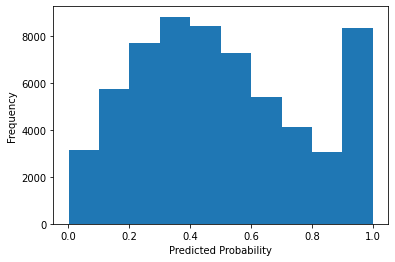

In [26]:

y_pred_proba = model.predict_proba(X_test)
pos_proba = y_pred_proba[:, 1]
plt.hist(pos_proba)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'ROC curve')

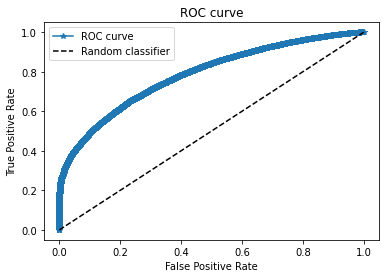

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(['ROC curve', 'Random classifier'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

(0.0, 1.0)

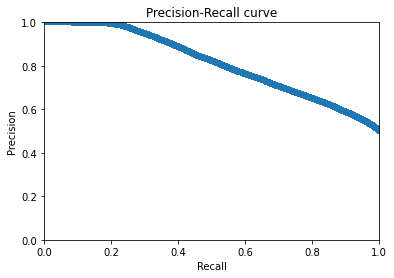

In [28]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba[:, 1])
plt.plot(recall, precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [29]:
print(f'The area under the precision-recall curve is: {metrics.auc(recall, precision)}')
print(f'The threshold for the model is {thresholds[-1]}')
print(f'The probability for the model is {pos_proba[-1] > thresholds[-1]}')
print('The AUC Score is: ', metrics.roc_auc_score(y_test, pos_proba))

The area under the precision-recall curve is: 0.8128859711392584
The threshold for the model is 0.9999960660934448
The probability for the model is False
The AUC Score is:  0.7851230921190899


In [30]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print('ROC: %.3f' % roc_auc_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

Accuracy: 0.7083938425791461
Precision: 0.7290462171461001
Recall: 0.6633104204989189
F1: 0.6946265630280499
ROC: 0.708
              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72     30987
         1.0       0.73      0.66      0.69     30987

    accuracy                           0.71     61974
   macro avg       0.71      0.71      0.71     61974
weighted avg       0.71      0.71      0.71     61974



### 5.4 Verifying best threshold

In [31]:
from sklearn.metrics import precision_recall_curve
from numpy import argmax
from sklearn.metrics import classification_report

Best Threshold=0.353858, F-Score=0.720


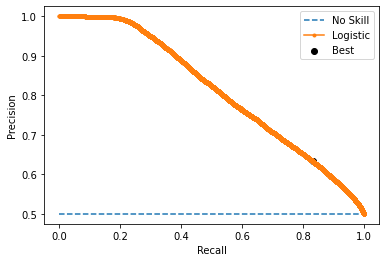

In [32]:
yhat = model.predict_proba(X_test)
yhat = yhat[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
fscore = (2 * precision * recall) / (precision + recall)
ix = argmax(fscore)
best_threshold = thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [33]:
y_pred_ba=model.predict_proba(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72     30987
         1.0       0.73      0.66      0.69     30987

    accuracy                           0.71     61974
   macro avg       0.71      0.71      0.71     61974
weighted avg       0.71      0.71      0.71     61974



In [34]:

threshold=best_threshold
pred2=pd.Series(y_pred_ba[:,1]).map(lambda x: 1 if x > 0.45 else 0)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

         0.0       0.71      0.68      0.70     30987
         1.0       0.69      0.72      0.71     30987

    accuracy                           0.70     61974
   macro avg       0.70      0.70      0.70     61974
weighted avg       0.70      0.70      0.70     61974



In [35]:
metrics.confusion_matrix(y_test, pred2)


array([[21108,  9879],
       [ 8576, 22411]], dtype=int64)

In [36]:
print(f'Accuracy: {accuracy_score(y_test, pred2)}')
print(f'Precision: {precision_score(y_test, pred2)}')
print(f'Recall: {recall_score(y_test, pred2)}')
print(f'F1: {f1_score(y_test, pred2)}')
print('ROC: %.3f' % roc_auc_score(y_test, pred2, average='micro'))
print(classification_report(y_test, pred2))

Accuracy: 0.7022138316068028
Precision: 0.6940538866522143
Recall: 0.7232387775518766
F1: 0.7083458444616528
ROC: 0.702
              precision    recall  f1-score   support

         0.0       0.71      0.68      0.70     30987
         1.0       0.69      0.72      0.71     30987

    accuracy                           0.70     61974
   macro avg       0.70      0.70      0.70     61974
weighted avg       0.70      0.70      0.70     61974



### Shap Value

In [37]:
import shap
plt.rcParams['figure.figsize'] = (12, 9)
plt.style.use('ggplot')
shap.initjs()

In [38]:
X_importance = X_test
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


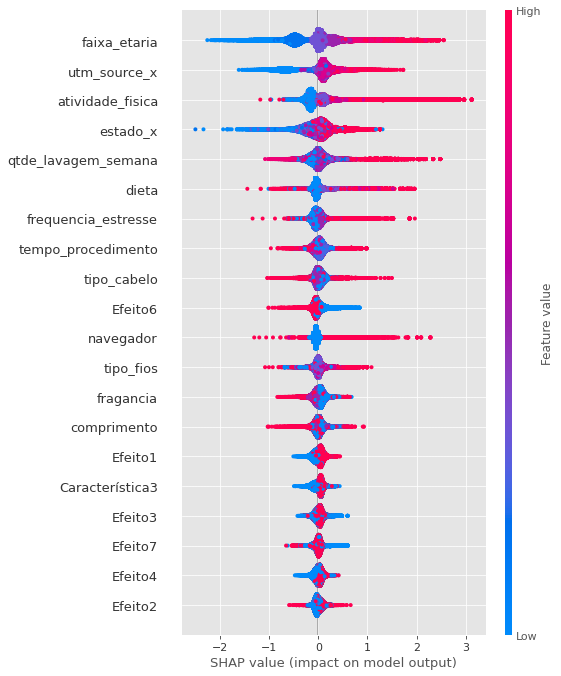

In [39]:
shap.summary_plot(shap_values, X_importance)


In [40]:
X_train.columns

Index(['navegador', 'estado_x', 'qtde_lavagem_semana', 'utm_source_x',
       'tipo_cabelo', 'comprimento', 'tipo_fios', 'tempo_procedimento',
       'dieta', 'atividade_fisica', 'frequencia_estresse', 'faixa_etaria',
       'fragancia', 'Característica1', 'Característica10', 'Característica2',
       'Característica3', 'Característica4', 'Característica5',
       'Característica6', 'Característica7', 'Característica8',
       'Característica9', 'N/C', 'Efeito1', 'Efeito10', 'Efeito2', 'Efeito3',
       'Efeito4', 'Efeito5', 'Efeito6', 'Efeito7', 'Efeito8',
       'Missing_efeitos_desejados', 'efeitos_desejados_N_C',
       ' Corte agressivo', ' Exposição ao sol', ' Nenhum', ' Tintura',
       'Corte agressivo', 'Exposição ao sol', 'N_C', 'Nenhum', 'Tintura',
       'Todos acima'],
      dtype='object')

In [ ]:
cols = ['faixa_etaria','utm_source_x','atividade_fisica','estado_x','qtde_lavagem_semana','dieta','frequencia_estresse','tipo_cabelo','navegador','tempo_procedimento','tipo_fios','comprimento']